# Forbes 2022 - In depth analysis and visualization

It’s been a year like no other, and we aren’t talking about the pandemic. There were rapid-fire public offerings, surging cryptocurrencies and skyrocketing stock prices. The number of billionaires on Forbes’ 36th annual list of the world’s wealthiest exploded to an unprecedented 2,668--660 more than a year ago. Of those, a record high 493 were new to the list--roughly one every 17 hours, including 210 from China and Hong Kong. Another 250 who’d fallen off in the past came roaring back. A staggering 86% are richer than a year ago.

_______________________________________________________________________________________________________________________________

## 1. Setup 


In [1]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")

In [2]:
#loading dataset

df = pd.read_csv("Forbes2022.csv")

#Data-Source: https://www.kaggle.com/datasets/prasertk/forbes-worlds-billionaires-list-2022

In [3]:
df.head()

rank                personName   age  finalWorth  year  month  \
0     1                 Elon Musk  50.0    219000.0  2022      4   
1     2                Jeff Bezos  58.0    171000.0  2022      4   
2     3  Bernard Arnault & family  73.0    158000.0  2022      4   
3     4                Bill Gates  66.0    129000.0  2022      4   
4     5            Warren Buffett  91.0    118000.0  2022      4   

                category              source        country       state  ...  \
0             Automotive       Tesla, SpaceX  United States       Texas  ...   
1             Technology              Amazon  United States  Washington  ...   
2       Fashion & Retail                LVMH         France         NaN  ...   
3             Technology           Microsoft  United States  Washington  ...   
4  Finance & Investments  Berkshire Hathaway  United States    Nebraska  ...   

                       organization selfMade gender   birthDate  \
0                             Tesla     True      M  1971-06-28   
1                            Amazon     True      M  1964-01-12   
2  LVMH Moët Hennessy Louis Vuitton    False      M  1949-03-05   
3   Bill & Melinda Gates Foundation     True      M  1955-10-28   
4                Berkshire Hathaway     True      M  1930-08-30   

              title philanthropyScore                 residenceMsa  \
0               CEO               1.0                          NaN   
1      Entrepreneur               1.0  Seattle-Tacoma-Bellevue, WA   
2  Chairman and CEO               NaN                          NaN   
3         Cofounder               4.0  Seattle-Tacoma-Bellevue, WA   
4               CEO               5.0                    Omaha, NE   

   numberOfSiblings                                                bio  \
0               NaN  Elon Musk is working to revolutionize transpor...   
1               NaN  Jeff Bezos founded e-commerce giant Amazon in ...   
2               NaN  Bernard Arnault oversees the LVMH empire of so...   
3               NaN  Bill Gates turned his fortune from software fi...   
4               NaN  Known as the "Oracle of Omaha," Warren Buffett...   

                                               about  
0  Musk was accepted to a graduate program at Sta...  
1  Growing up, Jeff Bezos worked summers on his g...  
2  Arnault apparently wooed his wife, Helene Merc...  
3  When Gates was a kid, he spent so much time re...  
4  Buffett still lives in the same Omaha, Nebrask...  

[5 rows x 22 columns]

In [6]:
df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [7]:
df.isnull().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

In [9]:
df.shape

(2668, 22)

There are 2668 records(Billionaires in the dataset)



_______________________________________________________________________________________________________________________________

## 2. EDA

In [17]:
#total value of billionaires combined is over 127 Trillion dollars
df.finalWorth.sum()/100000 


127.0595

In [18]:
#Top 20 Billionaires
top20 = df.groupby("personName").finalWorth.sum().sort_values(ascending= False).head(20)
top20


personName
Elon Musk                                219000.0
Jeff Bezos                               171000.0
Bernard Arnault & family                 158000.0
Bill Gates                               129000.0
Warren Buffett                           118000.0
Larry Page                               111000.0
Sergey Brin                              107000.0
Larry Ellison                            106000.0
Steve Ballmer                             91400.0
Mukesh Ambani                             90700.0
Gautam Adani & family                     90000.0
Michael Bloomberg                         82000.0
Carlos Slim Helu & family                 81200.0
Francoise Bettencourt Meyers & family     74800.0
Mark Zuckerberg                           67300.0
Jim Walton                                66200.0
Zhong Shanshan                            65700.0
Alice Walton                              65300.0
Changpeng Zhao                            65000.0
Rob Walton                             

In [19]:
dx= df[df["rank"]<20]
ax= px.bar(dx,x= "finalWorth",y= "personName",color= "finalWorth",labels= {"finalWorth":"Networth(in Billions)"},template= "plotly_dark")
ax.show()


Elon Musk is the richest person on the planet with a total networth of  219 Billion Followed by Jeff Bezos.
Other notable mentions are Bill Gates,Warren Buffet,Larry Page, etc



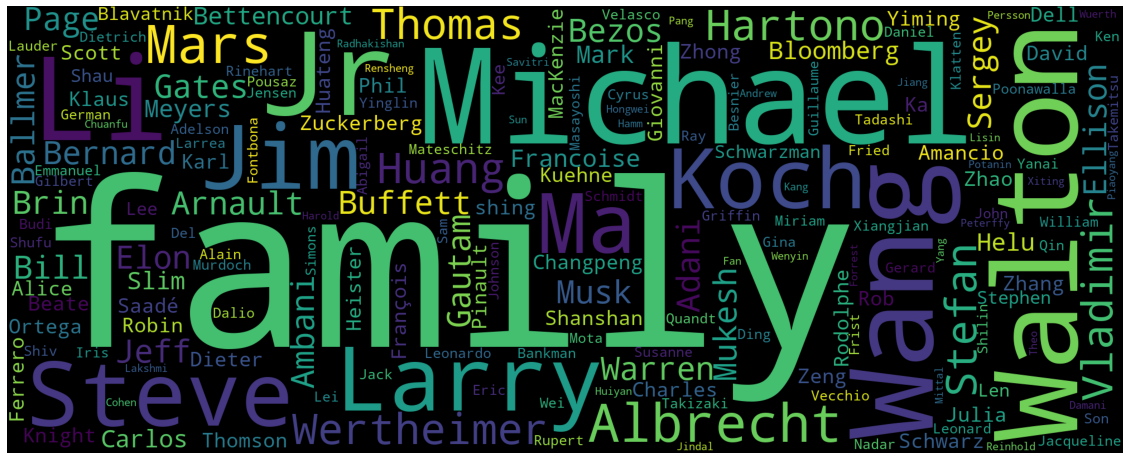

In [20]:
#Word cloud representing the top 100 billionaires
from wordcloud import WordCloud, STOPWORDS
dx= df[df["rank"]<100]
plt.figure(figsize= (20,20))
words= " ".join(dx["personName"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   


In [22]:
#Countries with most contribution to the total value.
x= df.groupby("country").finalWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()
ax= px.bar(x,x= "finalWorth",y= "country",color= "finalWorth",labels= {"finalWorth":"Total value(in Billions)"},template= "plotly_dark")
ax.show()


USA and China contribute most to the total values of billionaires followed by Germany and India



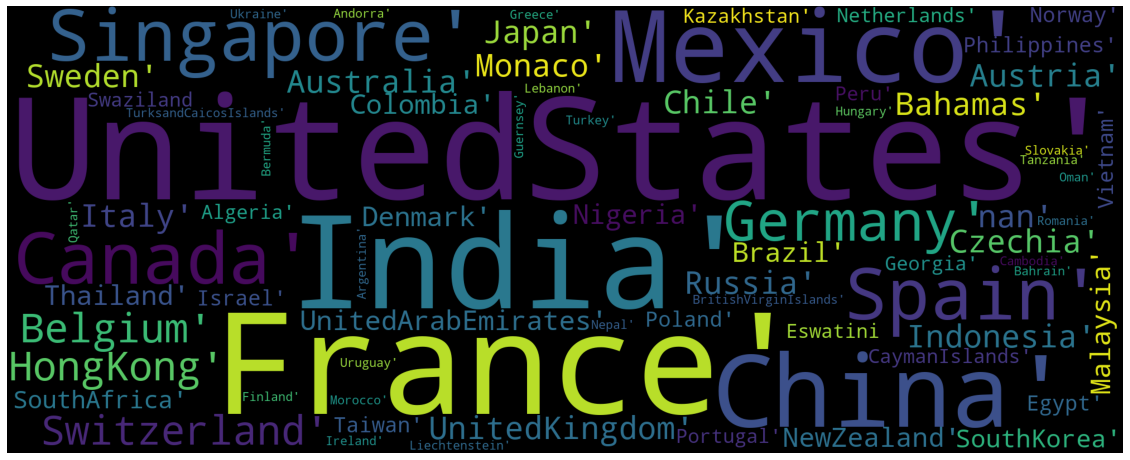

In [23]:
#Word cloud representing the top Countries
plt.figure(figsize= (20,20))
x= df
x["country"]= x.country.apply(lambda x: str(x).replace(" ",""))
words=str(x["country"].unique())
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   


In [24]:
#Countries with least contribution to the total value.
x= df.groupby("country").finalWorth.sum().sort_values(ascending= False).tail(10)
x


country
Guernsey                 2500.0
Hungary                  2500.0
Oman                     2500.0
Liechtenstein            2300.0
TurksandCaicosIslands    2200.0
Tanzania                 1500.0
Nepal                    1500.0
Bahrain                  1500.0
Greece                   1400.0
Andorra                  1300.0
Name: finalWorth, dtype: float64

In [25]:
#Countries with most number of Billionaires(top 20)
x= pd.DataFrame(df.country.value_counts().head(20).reset_index().values, columns=["Country", "No of Billionaires"])
x["No of Billionaires"]=x["No of Billionaires"].apply(lambda x: int(x))
ax= px.bar(x,x= "No of Billionaires",y= "Country",color= "No of Billionaires",template= "plotly_dark")
ax.show()


The USA has produced most number of 748  Billionaires out of 2668 followed by China(571 Billionaires) India ranks 3rd with a major difference from the first 2 countries number



In [26]:
#Countries with least number of Billionaires
df.country.value_counts().tail(20)


Qatar                    2
Hungary                  2
Slovakia                 2
Bermuda                  2
Tanzania                 1
Bahrain                  1
TurksandCaicosIslands    1
Portugal                 1
Liechtenstein            1
Nepal                    1
Guernsey                 1
Greece                   1
Georgia                  1
Oman                     1
BritishVirginIslands     1
Andorra                  1
Eswatini(Swaziland)      1
Cambodia                 1
Colombia                 1
Algeria                  1
Name: country, dtype: int64

In [27]:
#Tree map representing most number of Billionaires
ax= px.treemap(df,path=["country"],template= "plotly_dark")
ax.show()


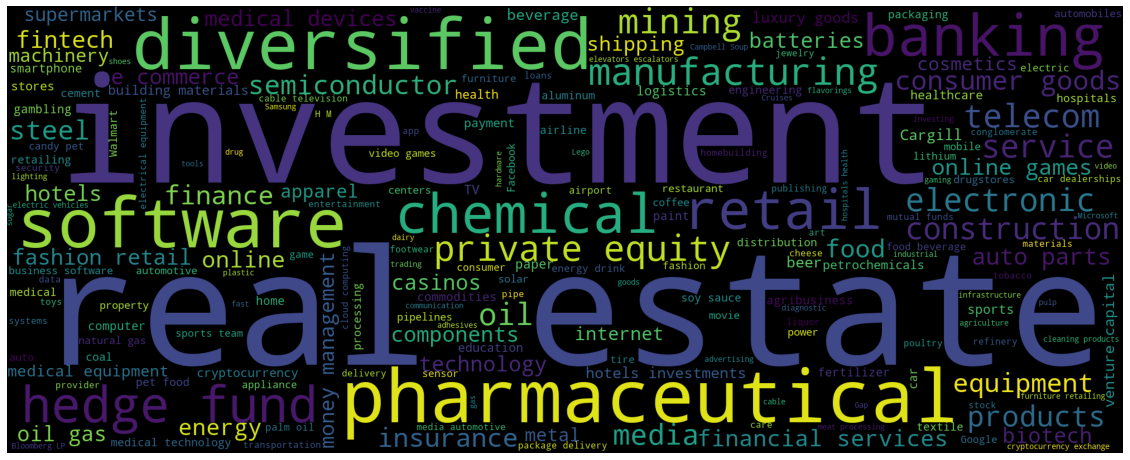

In [28]:
#Word cloud representing the top Sources
plt.figure(figsize= (20,20))
words= " ".join(df["source"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   


In [30]:
df.groupby("source").finalWorth.sum().sort_values(ascending= False).head(20)


source
real estate           576800.0
diversified           383000.0
investments           359300.0
software              296700.0
pharmaceuticals       286400.0
hedge funds           271600.0
Google                260900.0
Walmart               238000.0
Microsoft             232400.0
Tesla, SpaceX         219000.0
Amazon                214600.0
LVMH                  158000.0
mining                152000.0
private equity        151300.0
telecom               150500.0
retail                145300.0
chemicals             130400.0
Berkshire Hathaway    123400.0
Koch Industries       120000.0
shipping              105700.0
Name: finalWorth, dtype: float64

In [31]:
#Top sources of Billionaires
x= df.groupby("source").finalWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()
ax= px.bar(x,x= "finalWorth",y= "source",color= "finalWorth",labels= {"finalWorth":"Total value(in Billions)"},template= "plotly_dark")
ax.show()


The real estate source contributes the most values with a total of 576 Billions followed by diverified and investments.
Other notable sources are Tesla,SpaceX (219 Billion), Amazon(214 Billion) ,Google(260 Billion),Microsoft (232 Billion), etc



In [32]:
#Sources producing least value
df.groupby("source").finalWorth.sum().sort_values(ascending= False).tail(20)


source
steel, autoparts                  1000.0
IT consulting, outsourcing        1000.0
household appliances              1000.0
telecom equipment                 1000.0
garments                          1000.0
electric systems                  1000.0
real estate brokerage             1000.0
biological                        1000.0
construction, pipes, chemicals    1000.0
flavors and fragrances            1000.0
financial services, property      1000.0
cannabis                          1000.0
Navigation                        1000.0
Nordstrom department stores       1000.0
engineering, sugar                1000.0
cobalt mining                     1000.0
Fiberglass                        1000.0
liquefied petroleum gas           1000.0
energy drink                      1000.0
pharma retailing                  1000.0
Name: finalWorth, dtype: float64

In [33]:
#Tree map representing count of billionaires per source
ax= px.treemap(df,path=["source"],template= "plotly_dark")
ax.show()


_______________________________________________________________________________________________________________________________

## 3. Further analysis on German Billionaires


In [35]:
#creating separate dataframe for Germany
x= df[df["country"]=="Germany"]
len(x)

112

There are 112 Billionaires in Germany out of 2688 total



In [36]:
x.finalWorth.sum()

498900.0

498,90 Billion is the overall networth of German Billionaires



In [37]:
#Top 20 Billionaires in Germany
x.groupby("personName").finalWorth.sum().sort_values(ascending= False).head(20)


personName
Dieter Schwarz                                47100.0
Beate Heister & Karl Albrecht Jr. & family    36800.0
Susanne Klatten                               24300.0
Stefan Quandt                                 20700.0
Reinhold Wuerth & family                      19000.0
Theo Albrecht, Jr. & family                   18700.0
Thomas Struengmann & family                   11900.0
Andreas Struengmann & family                  11900.0
Alexander Otto                                10900.0
Friedhelm Loh                                  8900.0
Michael Otto                                   8900.0
Georg Schaeffler                               8100.0
Hasso Plattner & family                        7900.0
Axel Oberwelland & siblings                    6500.0
Juergen Blickle                                6400.0
Matthias Reimann-Andersen                      5800.0
Ludwig Merckle                                 5800.0
Aloys Wobben                                   5800.0
Wolfgang Reimann 

Dieter Schwarz is the richest person in Germany followed by the Albrecht Family



In [38]:
dx= x.groupby("personName").finalWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()


In [39]:
#Pie chart representation of German Billionaires(top 20)
ax= px.pie(dx,names="personName",values= "finalWorth" )
ax.show()


In [40]:
#Tree map representing of Top sources in Germany
ax= px.treemap(x,path=["source"],template= "plotly_dark")
ax.show()

In [41]:
#Top 10 sources in Germany
x.source.value_counts().head(10)


medical technology    8
pharmaceuticals       5
auto parts            5
consumer goods        5
retail                5
building materials    5
software              4
coffee                4
publishing            3
real estate           3
Name: source, dtype: int64

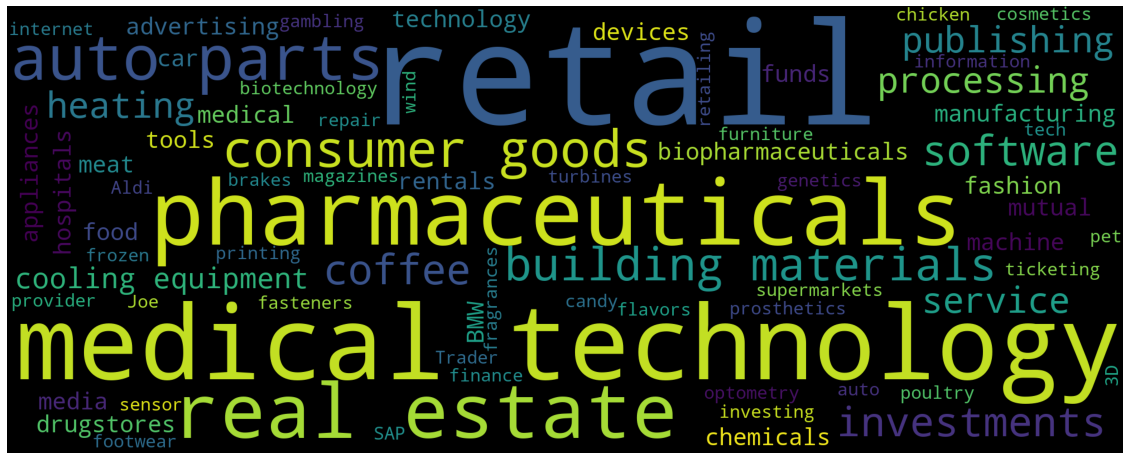

In [42]:
#Word cloud representing of sources in Germany
plt.figure(figsize= (20,20))
words= " ".join(x["source"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   


In [49]:
#SelfMade vs. Not-SelfMade and their total worth
sm = df.groupby("selfMade").finalWorth.sum().sort_values(ascending= False).to_frame().reset_index()
#Pie chart representation of selfMade Billionaires(top 20)
sx= px.pie(sm,names="selfMade",values= "finalWorth" )
sx.show()


In [50]:
#Gender and their total worth
sm = df.groupby("gender").finalWorth.sum().sort_values(ascending= False).to_frame().reset_index()
#Pie chart representation by gender
sx= px.pie(sm,names="gender",values= "finalWorth" )
sx.show()


_______________________________________________________________________________________________________________________________

## 4. Conclusion

- 2688 number of billionaires with ~13 trillion dollars of net worth

- Elon Musk and Jeff Bezos are richest on the planet

- USA and China produce most number of billionaires and also total values

- USA alone has 724 Billionaires contributing more than 4 Trillion dollars of networth

- Real Estate and diversified sources contribute to the highest value of in terms of sources followed by Investments

- 112 Billionaires in Germany

- Dieter Schwarz richest in Germany(47.1 Billion dollars)

- medical technology and pharmaceuticals are the top sources in Germany.